<a href="https://colab.research.google.com/github/daawonn/R_project/blob/master/5_%ED%95%9C%EA%B5%AD%EB%B3%B5%EC%A7%80%ED%8C%A8%EB%84%90%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국복지패널데이터분석 - R

In [0]:
# 패키지 준비하기 
install.packages("foreign")  # foreign 패키지 설치
library(foreign)             # SPSS 파일 로드
library(dplyr)               # 전처리
library(ggplot2)             # 시각화
library(readxl)              # 엑셀 파일 불러오기 

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpWqklX0\downloaded_packages


Warning message:
"package 'foreign' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'readxl' was built under R version 3.6.2"

In [0]:
# 데이터 준비하기 
# 데이터 불러오기
raw_welfare <- read.spss(file = './Koweps_hpc10_2015_beta1.sav', to.data.frame = T) 
 
# 복사본 만들기
welfare <- raw_welfare 

Warning message in read.spss(file = "./Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
"./Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

- 대규모 데이터는 변수가 많고 변수명이 코드로 되어 있어서 전체 데이터 구조를 한눈에 파악하기 어려움 
- 변수명을 쉬운 단어로 바꾼 후 분석에 사용할 변수들 각각 파악해야 함

In [0]:
head(welfare) 
tail(welfare) 
# View(welfare) 
# dim(welfare) 
# str(welfare) 
# summary(welfare) 

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
16659,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,7163,0,NA
16660,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16661,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,3630,NA,NA,0,NA
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,700,NA,0,NA
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


In [0]:
#변수명 바꾸기 
welfare <- rename(welfare,                   
                   sex = h10_g3,            # 성별
                   birth = h10_g4,          # 태어난 연도
                   marriage = h10_g10,      # 혼인 상태
                   religion = h10_g11,      # 종교
                   income = p1002_8aq1,     # 월급
                   code_job = h10_eco9,     # 직종 코드
                   code_region = h10_reg7)  # 지역 코드

## 데이터 분석 절차 
- 1단계. 변수 검토 및 전처리 
- 2단계. 변수 간 관계 분석 

## 성별에 따른 월급 차이 - "성별에 따라 월급이 다를까?" 
- 분석 절차 
    - 1. 변수 검토 및 전처리 
        - 성별  
        - 월급 
    - 2. 변수 간 관계 분석 
        - 성별 월급 평균표 만들기 
        - 그래프 만들기 

### 성별변수 검토 및 전처리

In [0]:
# 1. 변수 검토하기 
class(welfare$sex)
table(welfare$sex) 

[1] "numeric"


   1    2 
7578 9086 

In [0]:
# 2. 전처리 
# 이상치 확인
table(welfare$sex) 
# 이상치 결측 처리
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex) 
 
# 결측치 확인
table(is.na(welfare$sex)) 

# 성별 항목 이름 부여
welfare$sex <- ifelse(welfare$sex == 1, "male", "female") 
table(welfare$sex) 


   1    2 
7578 9086 


FALSE 
16664 


female   male 
  9086   7578 

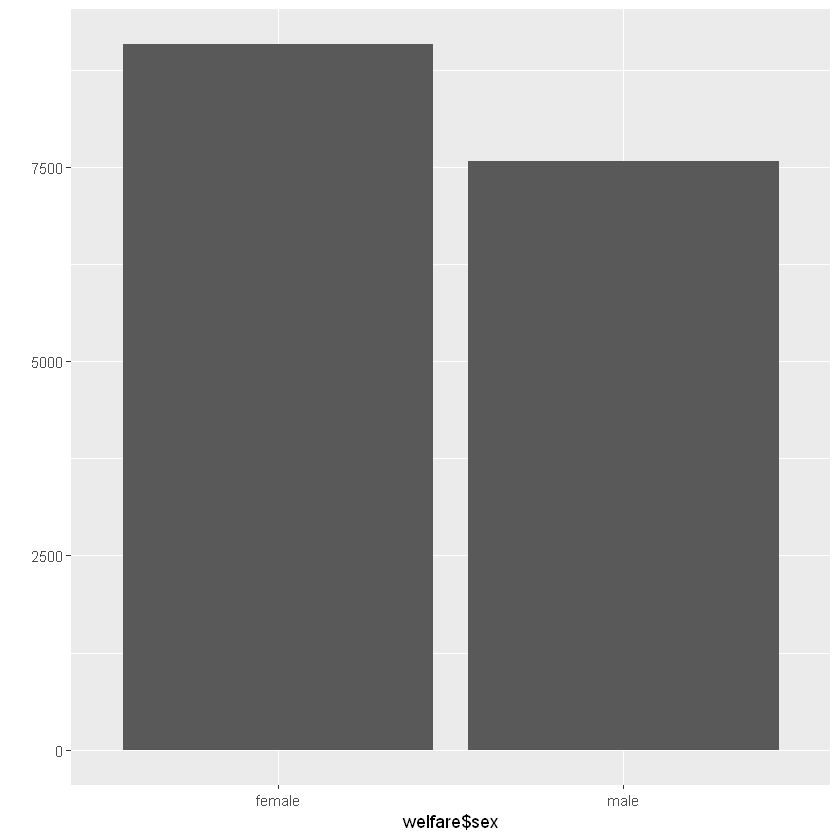

In [0]:

qplot(welfare$sex)

### 월급 변수 검토 및 전처리

In [0]:
# 1. 변수 검토하기 
class(welfare$income) 
summary(welfare$income) 

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."

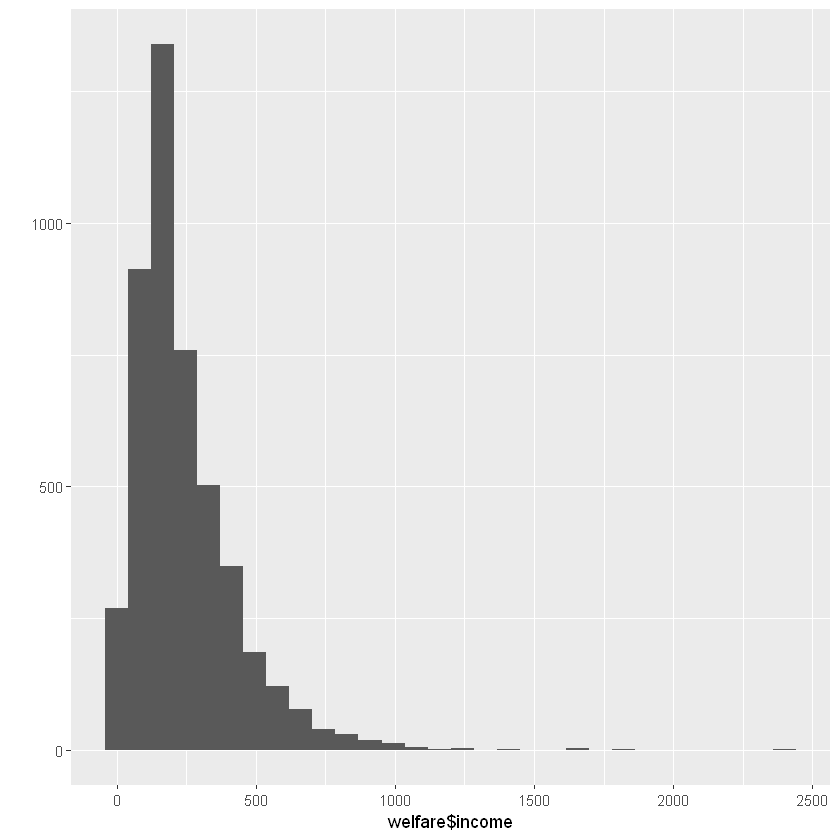

In [0]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

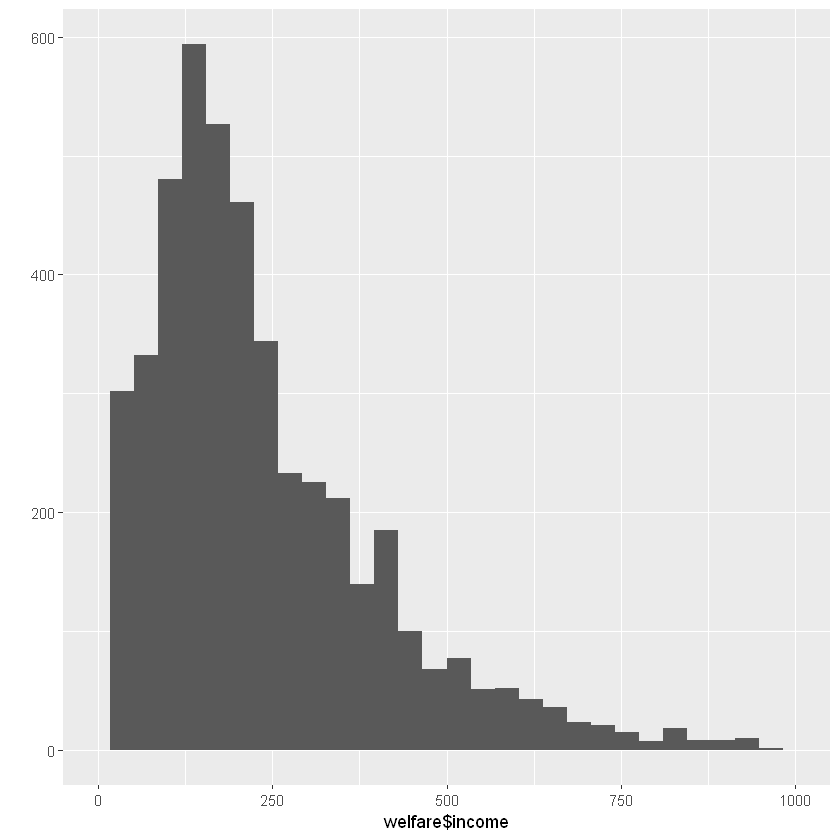

In [0]:
qplot(welfare$income) + xlim(0, 1000)

In [0]:
# 2. 전처리
# 이상치 확인
summary(welfare$income) 

# 이상치 결측 처리
welfare$income <- ifelse(welfare$income %in% c(0, 9999), NA, welfare$income) 
 
# 결측치 확인
table(is.na(welfare$income)) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 


FALSE  TRUE 
 4620 12044 

### 성별에 따른 월급 차이 분석하기 

In [0]:
# 1. 성별 월급 평균표 만들기 
sex_income <- welfare %>%   filter(!is.na(income)) %>%   group_by(sex) %>%   summarise(mean_income = mean(income)) 
 
sex_income  

sex,mean_income
female,163.2471
male,312.2932


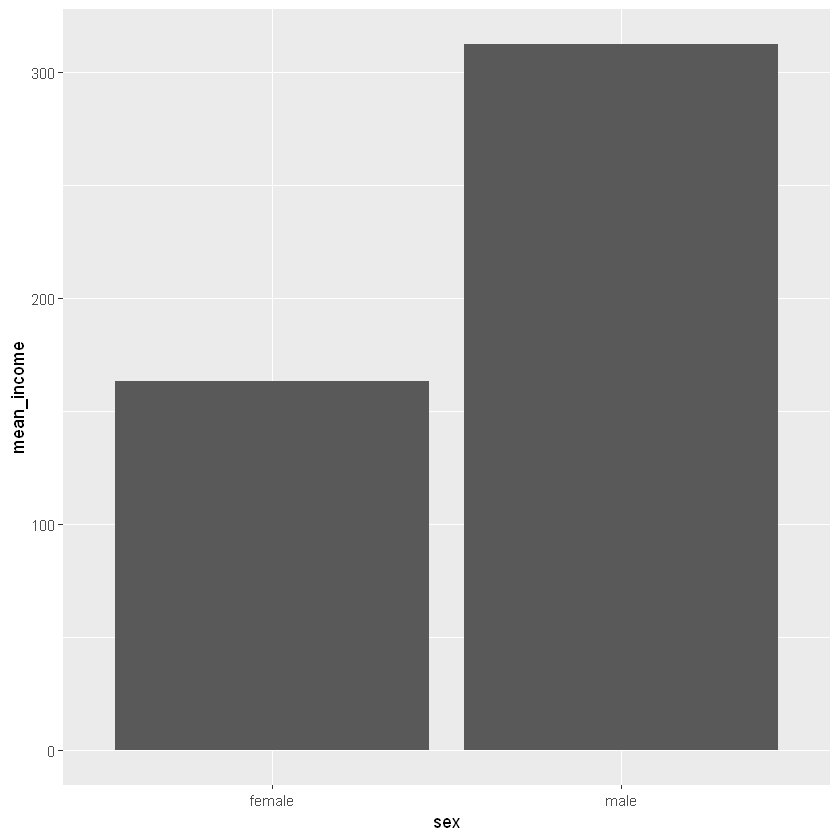

In [0]:
# 2. 그래프 만들기 
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col() 

## 나이와 월급의 관계 - "몇 살 때 월급을 가장 많이 받을까?" 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
        - 나이 
        - 월급 
    - 2. 변수 간 관계 분석 
        - 나이에 따른 월급 평균표 만들기 
        - 그래프 만들기 

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


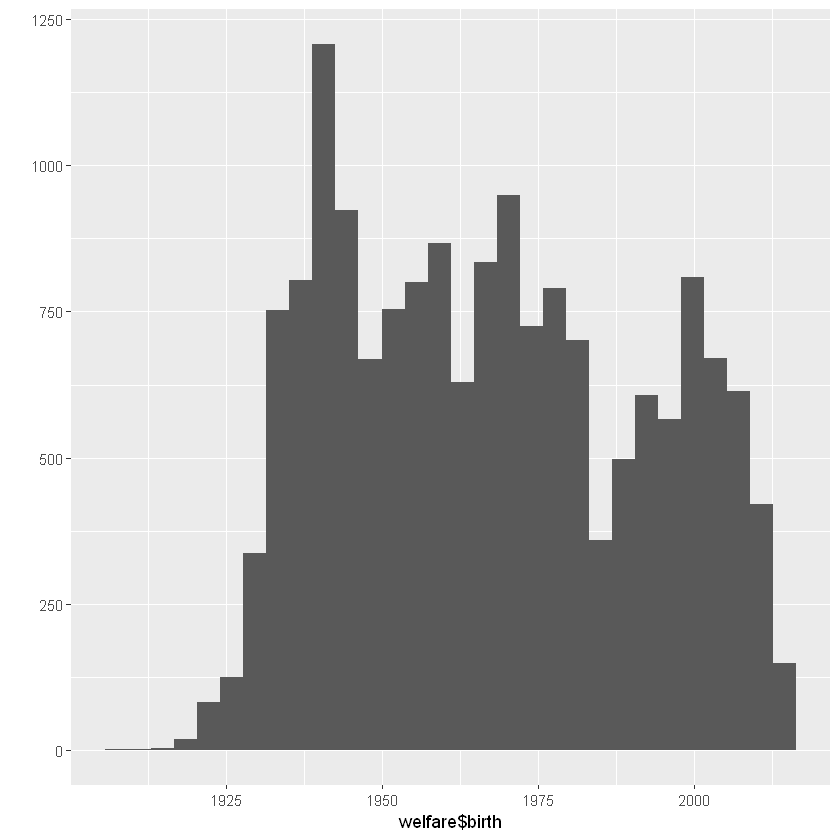

In [0]:
# 1. 변수 검토하기 
class(welfare$birth) 

summary(welfare$birth) 

qplot(welfare$birth) 

In [0]:
# 2. 전처리 
# 이상치 확인
summary(welfare$birth) 

# 결측치 확인
table(is.na(welfare$birth)) 

# 이상치 결측 처리
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth) 
table(is.na(welfare$birth)) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 


FALSE 
16664 


FALSE 
16664 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


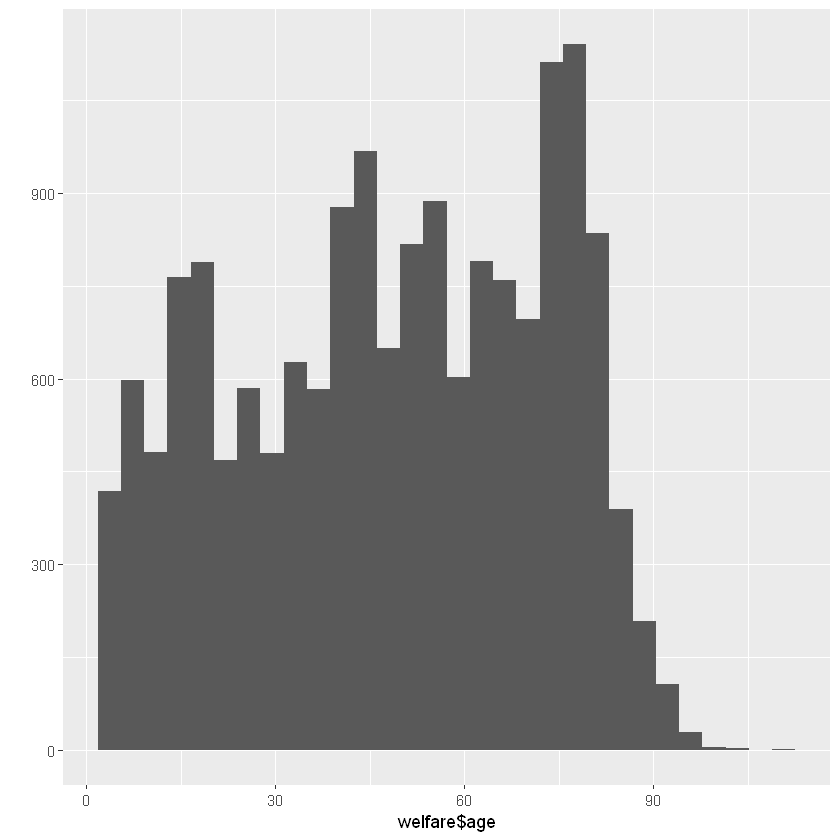

In [0]:
# 3. 파생변수 만들기 - 나이 
welfare$age <- 2015 - welfare$birth + 1 
summary(welfare$age) 

qplot(welfare$age) 

## 나이와 월급의 관계 분석하기 

In [0]:
# 1. 나이에 따른 월급 평균표 만들기 
age_income <- welfare %>%   filter(!is.na(income)) %>%   group_by(age) %>%   summarise(mean_income = mean(income)) 
 
head(age_income)

age,mean_income
20,121.3000
21,105.5185
22,130.0923
23,141.7157
24,134.0877
25,144.6559


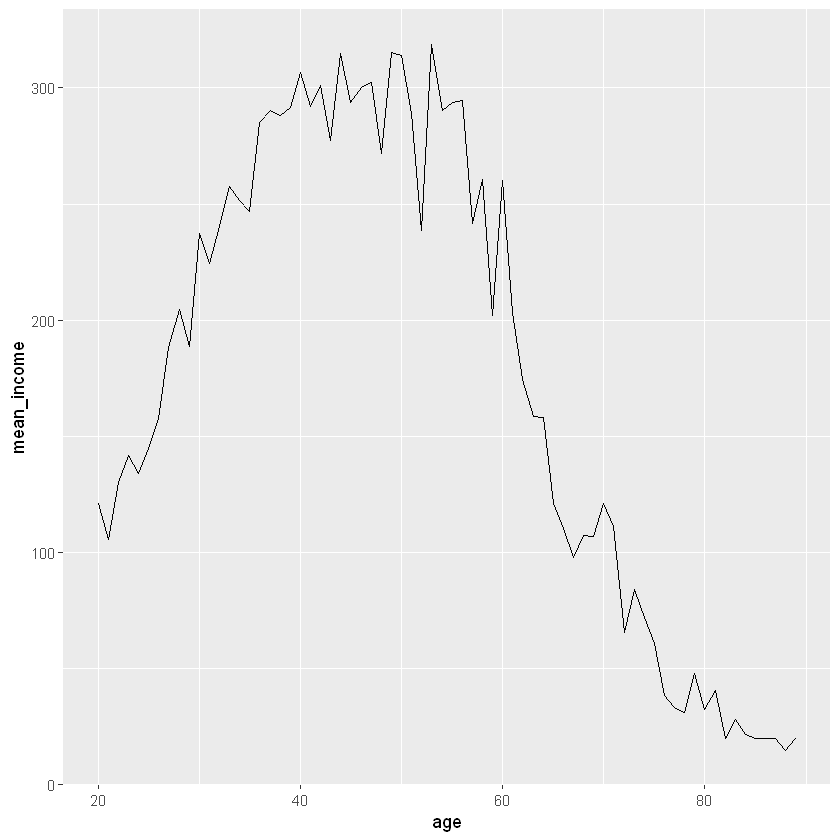

In [0]:
# 2. 그래프 만들기 
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line() 

# 연령대에 따른 월급 차이 - "어떤 연령대의 월급이 가장 많을까?" 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
        - 연령대 
        - 월급 
    - 2. 변수 간 관계 분석 
        - 연령대별 월급 평균표 만들기 
        - 그래프 만들기 

## 연령대 변수 검토 및 전처리하기 

In [0]:
# 파생변수 만들기 - 연령대 
# mutate 함수 사용 -> 새로운 열을 만들거나 조건에 따라 열을 변경할때 사용
welfare <- welfare %>%   mutate(ageg = ifelse(age < 30, "young",
                                              ifelse(age <= 59, "middle", "old"))) 
 
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 

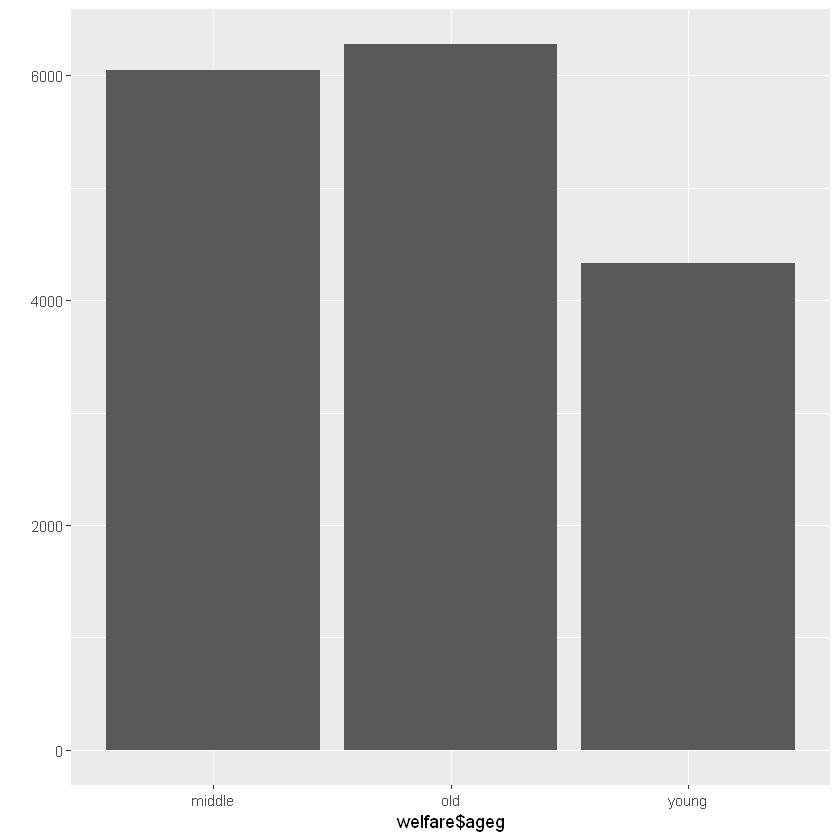

In [0]:
qplot(welfare$ageg)

## 연령대에 따른 월급 차이 분석하기 

In [0]:
# 1. 연령대별 월급 평균표 만들기 
# group_by & summarise 같이 사용하는것!
ageg_income <- welfare %>%
    filter(!is.na(income)) %>% 
    group_by(ageg) %>% 
    summarise(mean_income = mean(income)) 
 
ageg_income 

ageg,mean_income
middle,281.8871
old,125.3295
young,163.5953


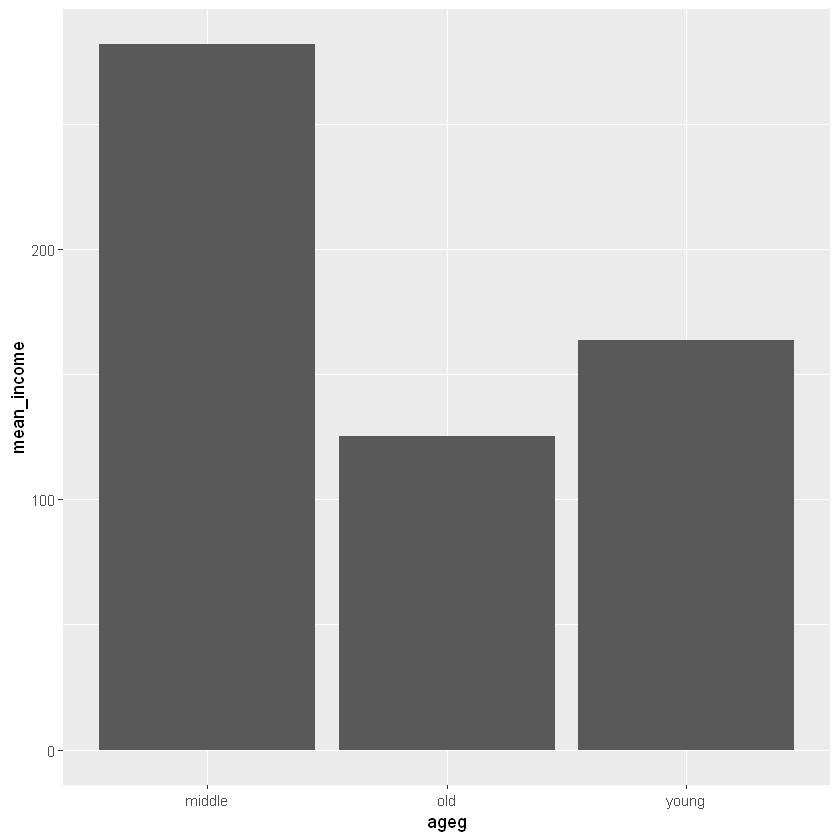

In [0]:
# 2. 그래프 만들기 
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) + geom_col() 

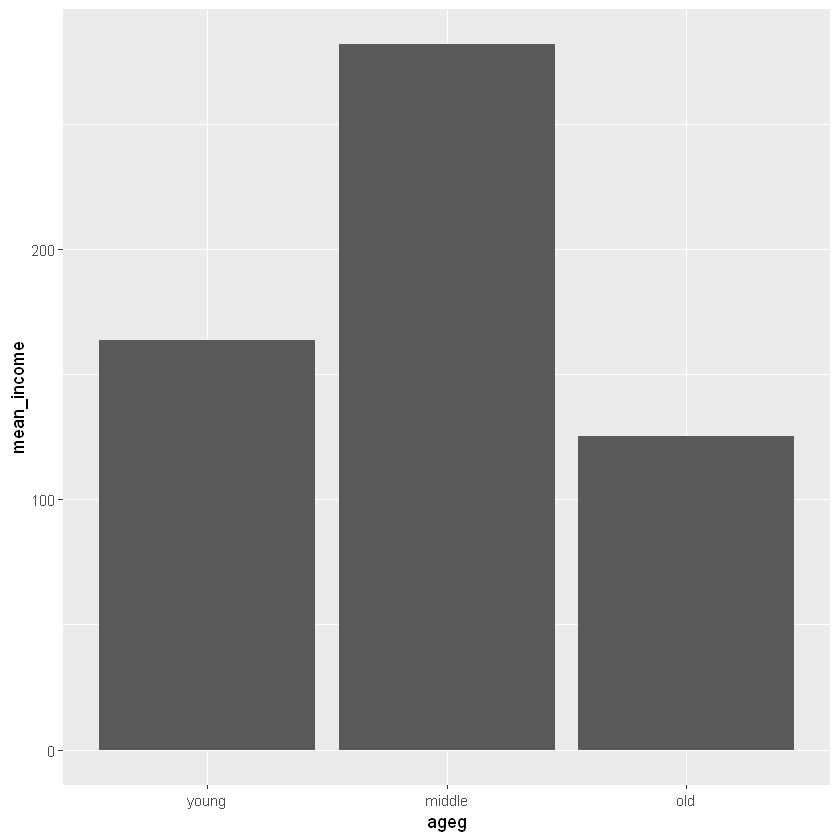

In [0]:
# 막대 정렬 : 초년, 중년, 노년 나이 순 
ggplot(data = ageg_income, aes(x = ageg, y = mean_income)) +   geom_col() +   scale_x_discrete(limits = c("young", "middle", "old")) 

## 연령대 및 성별 월급 차이 - "성별 월급 차이는 연령대별로 다를까?" 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
         -연령대 
         - 성별 
         - 월급 
    - 2. 변수 간 관계 분석 
         - 연령대 및 성별 월급 평균표 만들기 
         - 그래프 만들기 

### 연령대 및 성별 월급 차이 분석하기 

In [0]:
# 1. 연령대 및 성별 월급 평균표 만들기 
sex_income <- welfare %>%
    filter(!is.na(income)) %>% 
    group_by(ageg, sex) %>%  
    summarise(mean_income = mean(income)) 
 
sex_income
# 각 연령대별 3구간이 남녀 별로 6구간으로 나뉘어짐

ageg,sex,mean_income
middle,female,187.97552
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


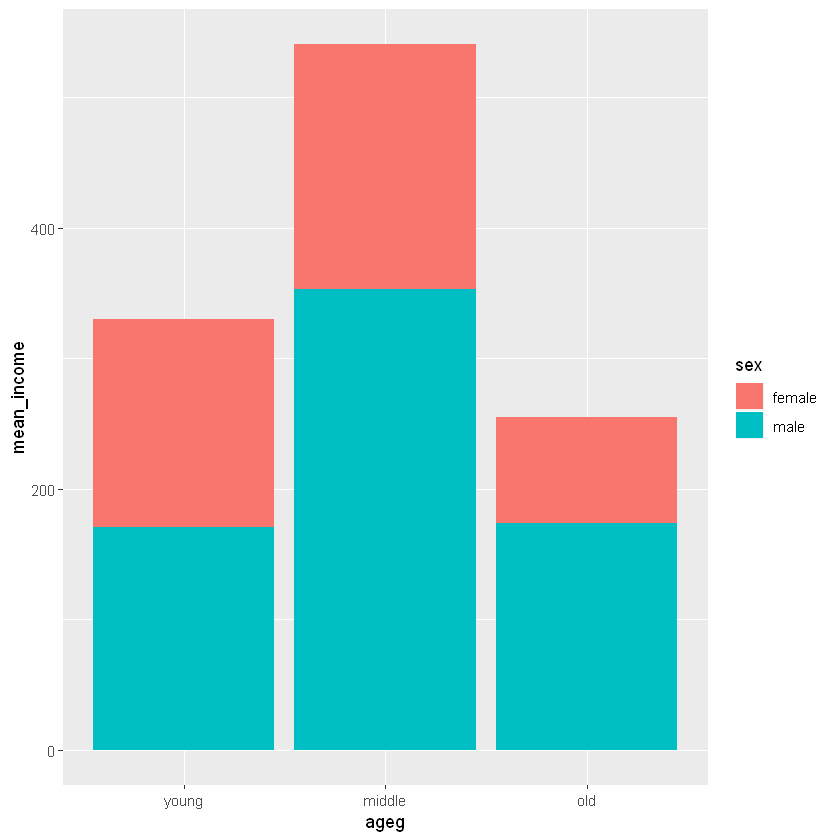

In [0]:
# 2. 그래프 만들기 
# 색을 성별로 나눠서 채우기 fill = sex 사용
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) +   geom_col() +   scale_x_discrete(limits = c("young", "middle", "old")) 

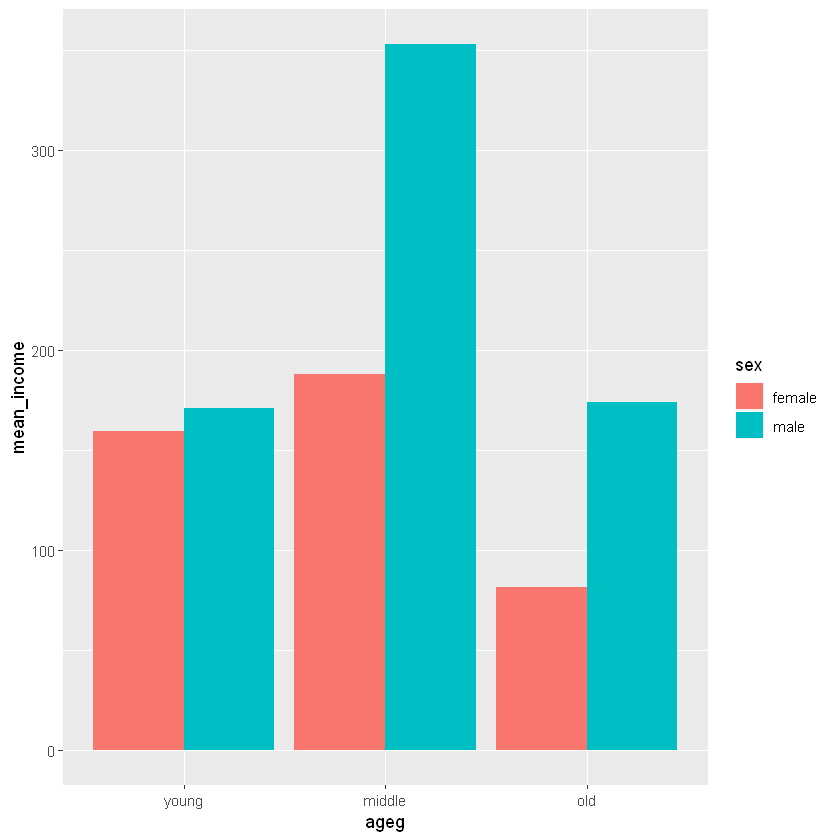

In [0]:
# 성별 막대 분리 
# 성별로 막대를 분리하기 위해서 position = "dodge" 사용
ggplot(data = sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
        geom_col(position = "dodge") + 
        scale_x_discrete(limits = c("young", "middle", "old")) 

### 나이 및 성별 월급 차이 분석하기 

In [0]:
# 성별 연령별 월급 평균표 만들기
sex_age <- welfare %>%   
    filter(!is.na(income)) %>% 
    group_by(age, sex) %>% 
    summarise(mean_income = mean(income)) 
 
head(sex_age) 

age,sex,mean_income
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


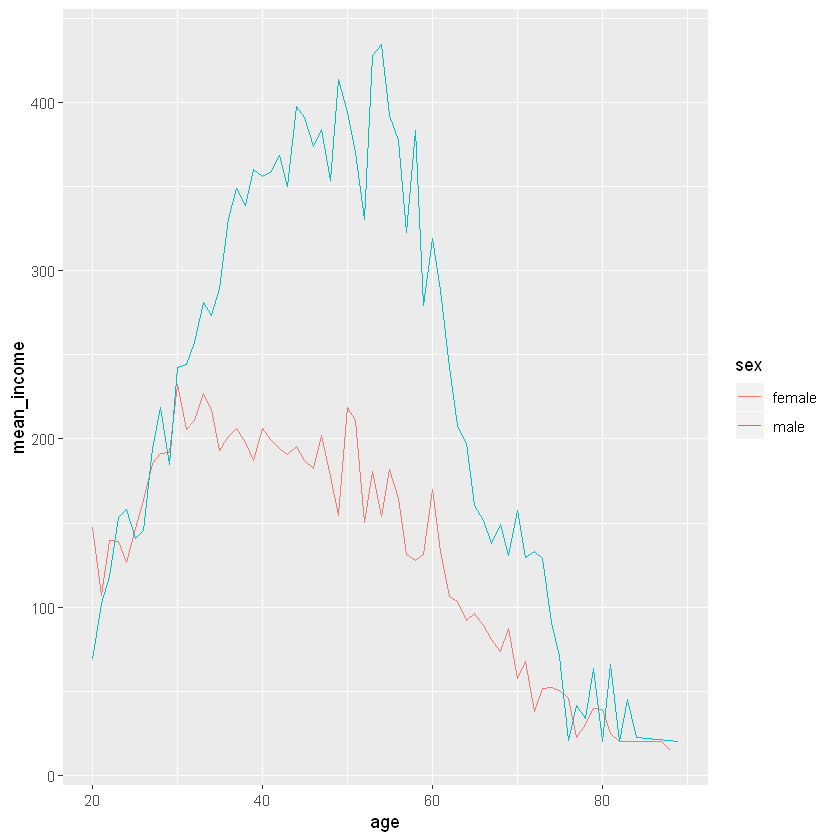

In [0]:
# 2. 그래프 만들기 
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) + geom_line() 

## 직업별 월급 차이 - "어떤 직업이 월급을 가장 많이 받을까?" 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
        - 직업 
        - 월급 
    - 2. 변수 간 관계 분석 
         - 직업별 월급 평균표 만들기 
         - 그래프 만들기 

In [0]:
# 1. 변수 검토하기 
class(welfare$code_job) 

table(welfare$code_job)

[1] "numeric"


 111  120  131  132  133  134  135  139  141  149  151  152  153  159  211  212 
   2   16   10   11    9    3    7   10   35   20   26   18   15   16    8    4 
 213  221  222  223  224  231  232  233  234  235  236  237  239  241  242  243 
   3   17   31   12    4   41    5    3    6   48   14    2   29   12    4   63 
 244  245  246  247  248  251  252  253  254  259  261  271  272  273  274  281 
   4   33   59   77   38   14  111   24   67  109    4   15   11    4   36   17 
 283  284  285  286  289  311  312  313  314  320  330  391  392  399  411  412 
   8   10   26   16    5  140  260  220   84   75   15    4   13   87   47   12 
 421  422  423  429  431  432  441  442  510  521  522  530  611  612  613  620 
 124   71    5   14   20   33  154  197  192  353    5  106 1320   11   40    2 
 630  710  721  722  730  741  742  743  751  752  753  761  762  771  772  773 
  20   29   30   22   16   27    3   34   34    5   49   69   27   11   61   86 
 774  780  791  792  799  8

In [0]:
# 2. 전처리 
# 직업분류코드 목록 불러오기 
library(readxl) 
list_job <- read_excel("./Koweps_Codebook.xlsx", col_names = T, sheet = 2) 
head(list_job) 

code_job,job
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자


In [0]:
# welfare에 직업명 결합 
welfare <- left_join(welfare, list_job, id = "code_job") 
# Joining, by = "code_job" 
welfare %>%   filter(!is.na(code_job)) %>%   select(code_job, job) %>%   head(10)

Joining, by = "code_job"


code_job,job
942,경비원 및 검표원
762,전기공
530,방문 노점 및 통신 판매 관련 종사자
999,기타 서비스관련 단순 종사원
312,경영관련 사무원
254,문리 기술 및 예능 강사
510,영업 종사자
530,방문 노점 및 통신 판매 관련 종사자
286,스포츠 및 레크레이션 관련 전문가
521,매장 판매 종사자


### 직업별 월급 차이 분석하기

In [0]:
# 1. 직업별 월급 평균표 만들기 
job_income <- welfare %>%   filter(!is.na(job) & !is.na(income)) %>%   group_by(job) %>%   summarise(mean_income = mean(income)) 
 
head(job_income)

job,mean_income
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [0]:
# 2. 상위 10개 추출 
top10 <- job_income %>%   arrange(desc(mean_income)) %>%   head(10) 
 
top10 

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


In [0]:
# 2. 상위 10개 추출 
top10 <- job_income %>%   arrange(desc(mean_income)) %>%   head(10) 
 
top10 

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


In [0]:
# 4. 하위 10위 추출 
bottom10 <- job_income %>%   arrange(mean_income) %>%   head(10) 
 
bottom10 

job,mean_income
가사 및 육아 도우미,80.16648
임업관련 종사자,83.33000
기타 서비스관련 단순 종사원,88.22101
청소원 및 환경 미화원,88.78775
약사 및 한약사,89.00000
작물재배 종사자,92.00000
농립어업관련 단순 종사원,101.58125
의료 복지 관련 서비스 종사자,103.52643
음식관련 단순 종사원,107.84511
판매관련 단순 종사원,116.82203


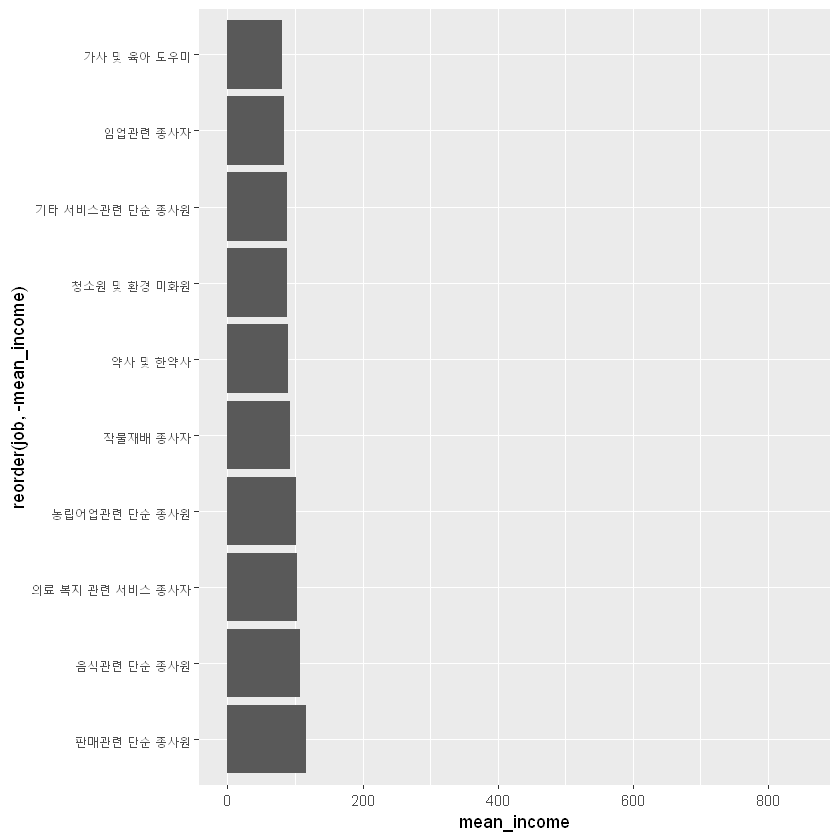

In [0]:
# 5. 그래프 만들기 
ggplot(data = bottom10, aes(x = reorder(job, -mean_income),
                            y = mean_income)) + 
                            geom_col() +   coord_flip() +   ylim(0, 850) 

## 09-7. 성별 직업 빈도 - "성별로 어떤 직업이 가장 많을까?" 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
        - 성별 
        - 직업 
    - 2. 변수 간 관계 분석 
        - 성별 직업 빈도표 만들기 
        - 그래프 만들기 

### 성별 직업 빈도 분석하기 

In [0]:
# 1. 성별 직업 빈도표 만들기 
# 남성 직업 빈도 상위 10 개 추출
job_male <- welfare %>%   filter(!is.na(job) & sex == "male") %>%   group_by(job) %>%   summarise(n = n()) %>%   arrange(desc(n)) %>%   head(10) 
 
job_male

job,n
작물재배 종사자,640
자동차 운전원,251
경영관련 사무원,213
영업 종사자,141
매장 판매 종사자,132
제조관련 단순 종사원,104
청소원 및 환경 미화원,97
건설 및 광업 단순 종사원,95
경비원 및 검표원,95
행정 사무원,92


In [0]:
# 여성 직업 빈도 상위 10 개 추출
job_female <- welfare %>%   filter(!is.na(job) & sex == "female") %>%   group_by(job) %>%   summarise(n = n()) %>%   arrange(desc(n)) %>%   head(10) 
 
job_female

job,n
작물재배 종사자,680
청소원 및 환경 미화원,228
매장 판매 종사자,221
제조관련 단순 종사원,185
회계 및 경리 사무원,176
음식서비스 종사자,149
주방장 및 조리사,126
가사 및 육아 도우미,125
의료 복지 관련 서비스 종사자,121
음식관련 단순 종사원,104


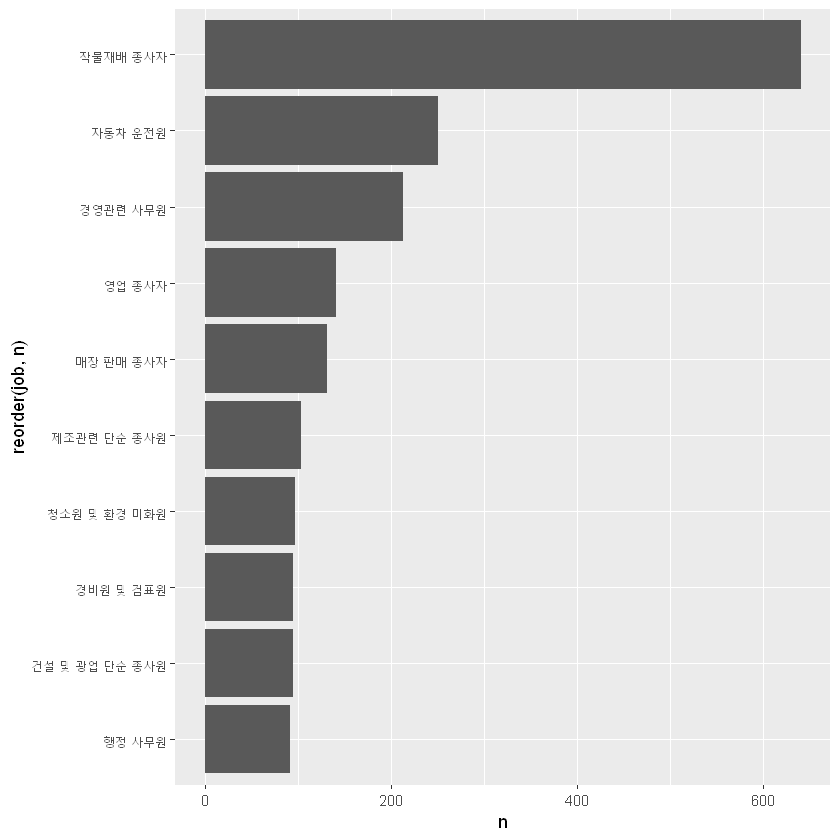

In [0]:
# 2. 그래프 만들기 
# 남성 직업 빈도 상위 10 개 직업
ggplot(data = job_male, aes(x = reorder(job, n), y = n)) +
geom_col() +   coord_flip() 

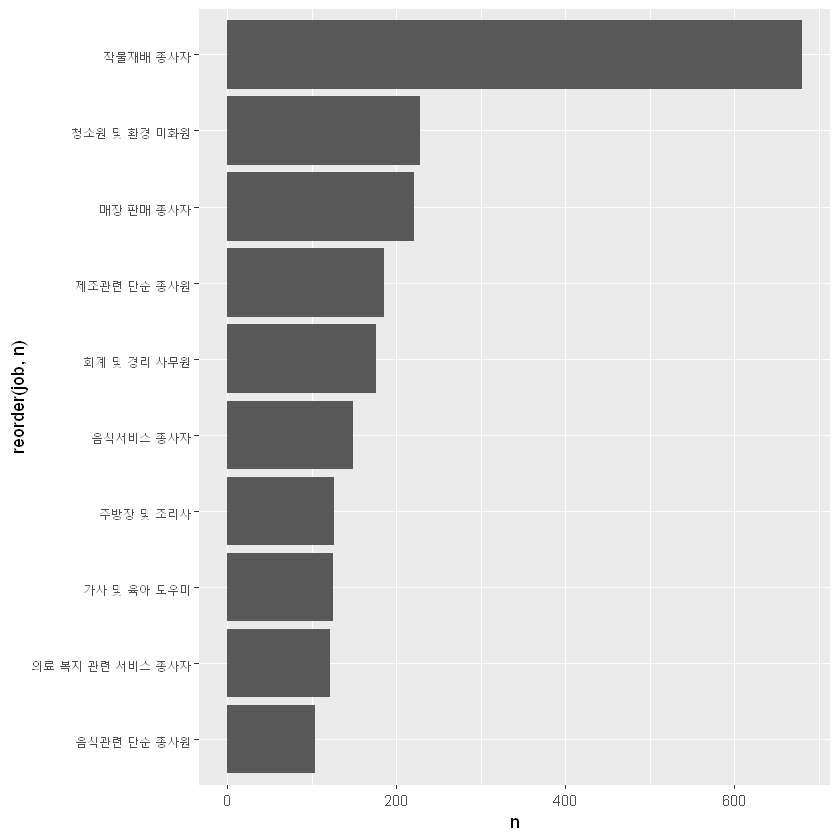

In [0]:
# # 여성 직업 빈도 상위 10 개 직업
ggplot(data = job_female, aes(x = reorder(job, n), y = n)) +
geom_col() +   coord_flip() 
 

## 09-8. 종교 유무에 따른 이혼율 - "종교가 있는 사람들이 이혼을 덜 할까? 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
         - 종교 
         - 혼인 상태 
    - 2. 변수 간 관계 분석 
         - 종교 유무에 따른 이혼율 표 만들기 
         - 그래프 만들기 

### 종교 변수 검토 및 전처리하기 

In [0]:
# 1. 변수 검토하기 
class(welfare$religion) 
table(welfare$religion) 

[1] "numeric"


   1    2 
8047 8617 


  no  yes 
8617 8047 

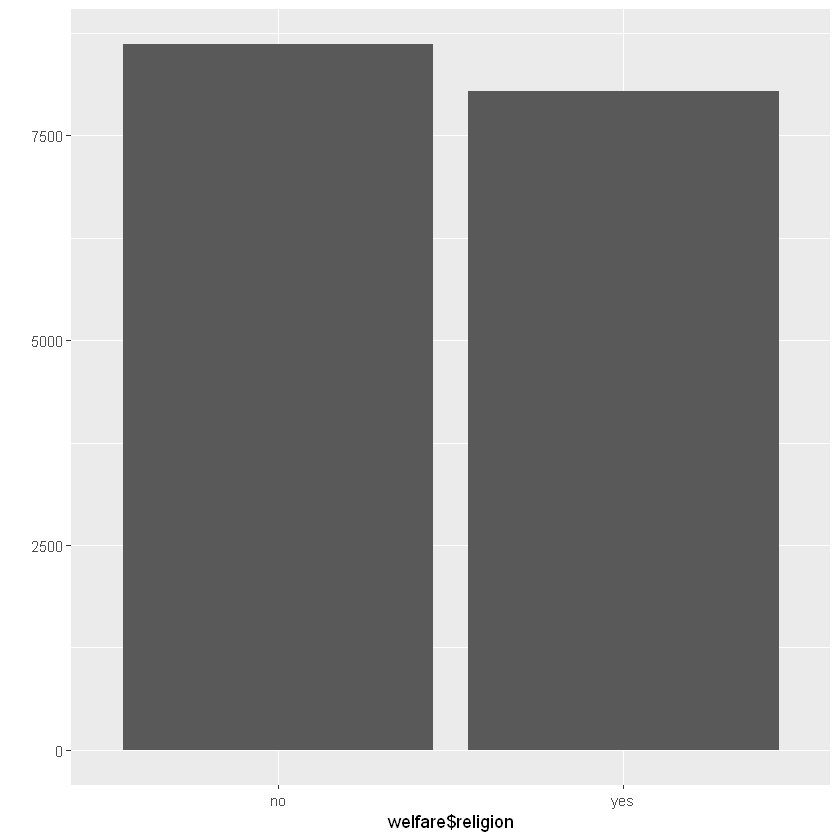

In [0]:
# 2. 전처리 
# 종교 유무 이름 부여
welfare$religion <- ifelse(welfare$religion == 1, "yes", "no") 
table(welfare$religion)
qplot(welfare$religion)

### 혼인 상태 변수 검토 및 전처리하기 

In [0]:
# 1. 변수 검토하기 
class(welfare$marriage) 

table(welfare$marriage) 

[1] "numeric"


   0    1    2    3    4    5    6 
2861 8431 2117  712   84 2433   26 

In [0]:
# 2. 전처리 
# 이혼 여부 변수 만들기
welfare$group_marriage <- ifelse(welfare$marriage == 1, "marriage",
                                 ifelse(welfare$marriage == 3, "divorce", NA)) 
 
table(welfare$group_marriage) 
table(is.na(welfare$group_marriage)) 


 divorce marriage 
     712     8431 


FALSE  TRUE 
 9143  7521 

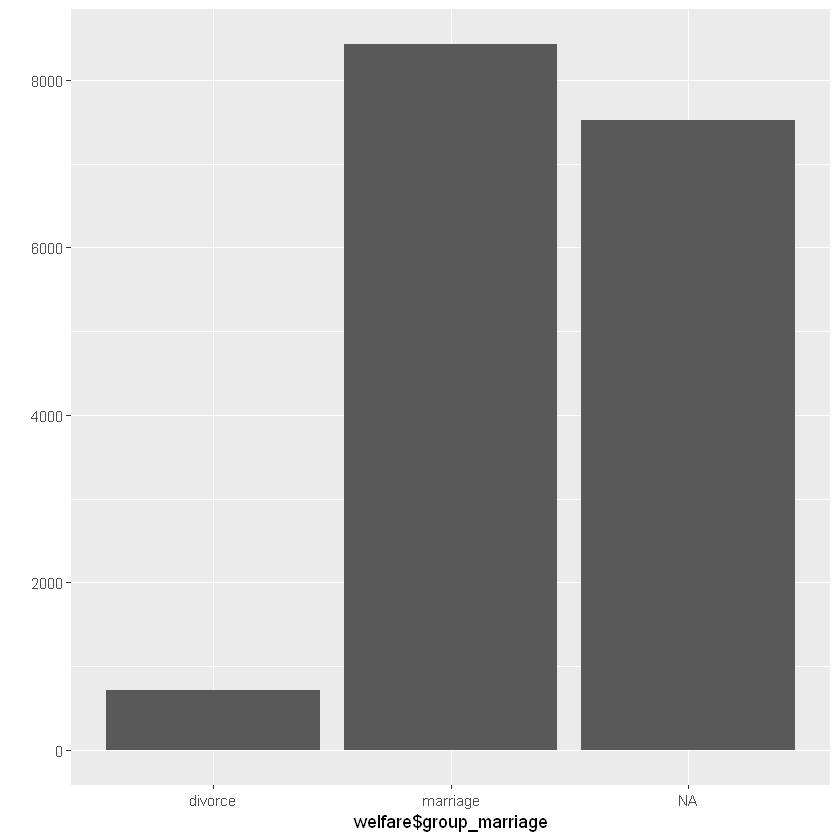

In [0]:
qplot(welfare$group_marriage)

###  종교 유무에 따른 이혼율 분석하기 

In [0]:
# 1. 종교 유무에 따른 이혼율 표 만들기 
religion_marriage <- welfare %>%   
        filter(!is.na(group_marriage)) %>%   
        group_by(religion, group_marriage) %>%   
        summarise(n = n()) %>%   
        mutate(tot_group = sum(n)) %>%   
        mutate(pct = round(n/tot_group*100, 1)) 
 
religion_marriage

religion,group_marriage,n,tot_group,pct
no,divorce,384,4602,8.3
no,marriage,4218,4602,91.7
yes,divorce,328,4541,7.2
yes,marriage,4213,4541,92.8


In [0]:
# count() 활용 
religion_marriage <- welfare %>%
    filter(!is.na(group_marriage)) %>%
    count(religion, group_marriage) %>%
    group_by(religion) %>%
    mutate(pct = round(n/sum(n)*100, 1)) 

In [0]:
# 2. 이혼율 표 만들기 
# 이혼 추출
divorce <- religion_marriage %>%   filter(group_marriage == "divorce") %>%   select(religion, pct) 
 
divorce 

religion,pct
no,8.3
yes,7.2


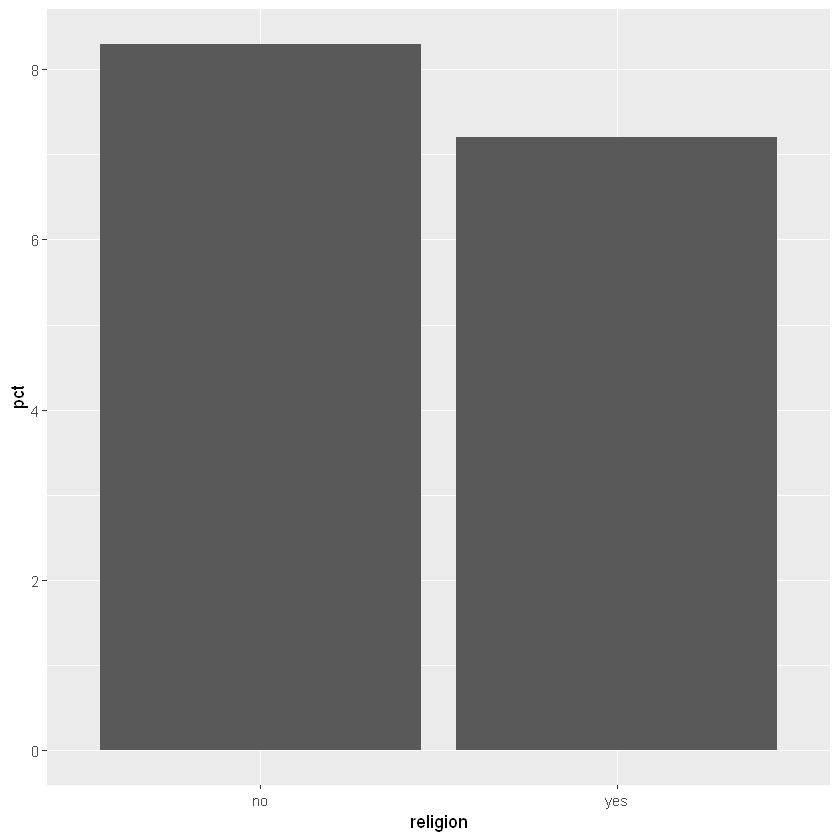

In [0]:
# 3. 그래프 만들기 
ggplot(data = divorce, aes(x = religion, y = pct)) + geom_col() 

### 연령대 및 종교 유무에 따른 이혼율 분석하기 

In [0]:
# 1. 연령대별 이혼율 표 만들기 
ageg_marriage <- welfare %>%
    filter(!is.na(group_marriage)) %>%
    group_by(ageg, group_marriage) %>%
    summarise(n = n()) %>%
    mutate(tot_group = sum(n)) %>%
    mutate(pct = round(n/tot_group*100, 1)) 
 
ageg_marriage 

ageg,group_marriage,n,tot_group,pct
middle,divorce,437,4918,8.9
middle,marriage,4481,4918,91.1
old,divorce,273,4165,6.6
old,marriage,3892,4165,93.4
young,divorce,2,60,3.3
young,marriage,58,60,96.7


In [0]:
# count() 활용 
# ageg_marriage <- welfare %>%  
# filter(!is.na(group_marriage)) %>%  
# count(ageg, group_marriage) %>% 
# group_by(ageg) %>% 
# mutate(pct = round(n/sum(n)*100, 1)) 

In [0]:
# 2. 연령대별 이혼율 그래프 만들기 
# 초년 제외 , 이혼 추출
ageg_divorce <- ageg_marriage %>%   
    filter(ageg != "young" & group_marriage == "divorce") %>%
    select(ageg, pct) 

ageg_divorce

ageg,pct
middle,8.9
old,6.6


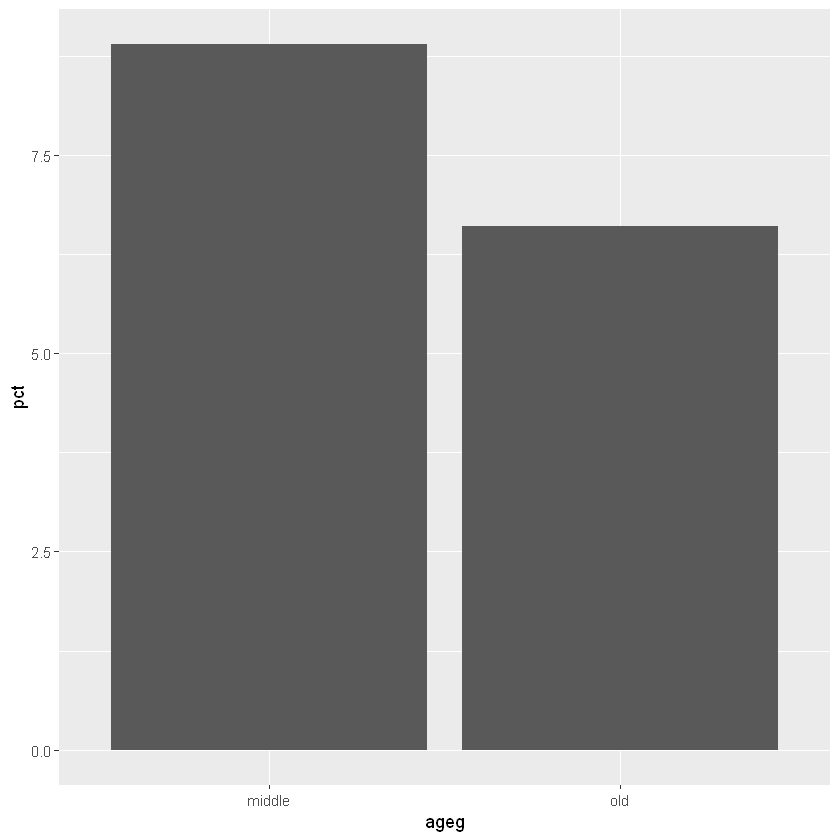

In [0]:
# 그래프 만들기
ggplot(data = ageg_divorce, aes(x = ageg, y = pct)) + geom_col() 

In [0]:
# 3. 연령대 및 종교 유무에 따른 이혼율 표 만들기 
# 연령대 , 종교유무 , 결혼상태별 비율표 만들기
ageg_religion_marriage <- welfare %>%
    filter(!is.na(group_marriage) & ageg != "young") %>%
    group_by(ageg, religion, group_marriage) %>%
    summarise(n = n()) %>% 
    mutate(tot_group = sum(n)) %>%  
    mutate(pct = round(n/tot_group*100, 1)) 
 
ageg_religion_marriage

ageg,religion,group_marriage,n,tot_group,pct
middle,no,divorce,260,2681,9.7
middle,no,marriage,2421,2681,90.3
middle,yes,divorce,177,2237,7.9
middle,yes,marriage,2060,2237,92.1
old,no,divorce,123,1884,6.5
old,no,marriage,1761,1884,93.5
old,yes,divorce,150,2281,6.6
old,yes,marriage,2131,2281,93.4


In [0]:
# count() 활용 
# ageg_religion_marriage <- welfare %>%  
# filter(!is.na(group_marriage) & ageg != "young") %>%   
# count(ageg, religion, group_marriage) %>%
# group_by(ageg, religion) %>%  
# mutate(pct = round(n/sum(n)*100, 1)) 

In [0]:
# 연령대 및 종교 유무별 이혼율 표 만들기 
df_divorce <- ageg_religion_marriage %>%   filter(group_marriage == "divorce") %>%   select(ageg, religion, pct) 
 
df_divorce 

ageg,religion,pct
middle,no,9.7
middle,yes,7.9
old,no,6.5
old,yes,6.6


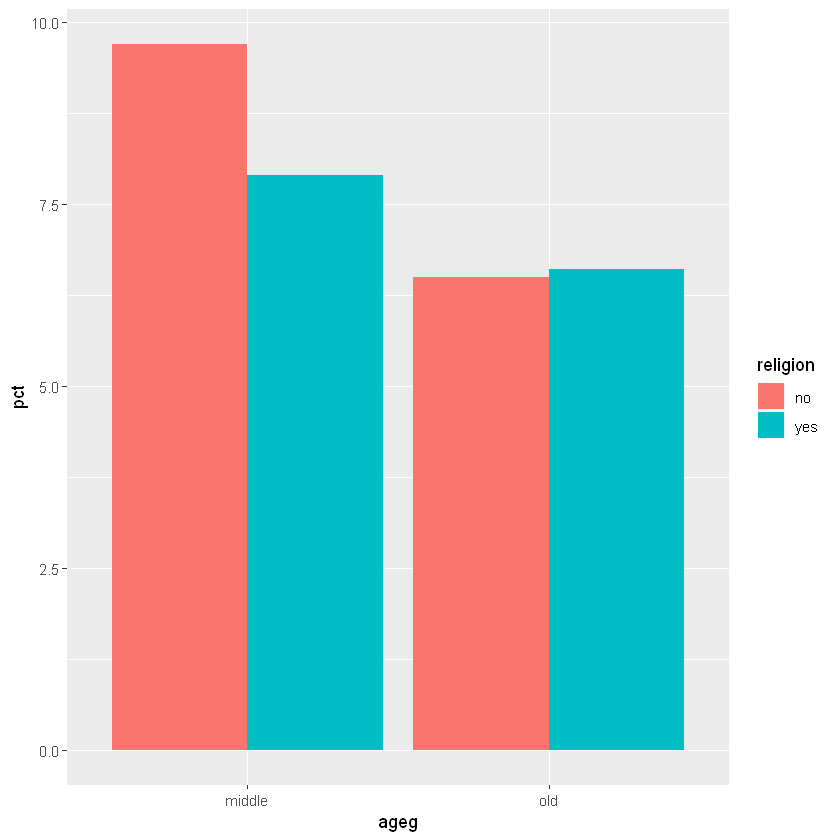

In [0]:
# 4. 연령대 및 종교 유무에 따른 이혼율 그래프 만들기 
ggplot(data = df_divorce, aes(x = ageg, y = pct, fill = religion )) +   geom_col(position = "dodge") 

## 09-9. 지역별 연령대 비율 - "노년층이 많은 지역은 어디일까?" 

- 분석 절차 
    - 1. 변수 검토 및 전처리 
         - 지역 
         - 연령대 
    - 2. 변수 간 관계 분석 
        - 지역별 연령대 비율표 만들기 
        - 그래프 만들기 

### 지역 변수 검토 및 전처리하기 

In [0]:
# 1. 변수 검토하기 
class(welfare$code_region) 

table(welfare$code_region) 

[1] "numeric"


   1    2    3    4    5    6    7 
2486 3711 2785 2036 1467 1257 2922 

In [0]:
# 2. 전처리 
# 지역 코드 목록 만들기
 list_region <- data.frame(code_region = c(1:7),                           
                           region = c("서울",                                      
                                       "수도권(인천/경기)",                                      
                                       "부산/경남/울산",                                      
                                       "대구/경북",
                                        "대전/충남",
                                        "강원/충북",                                      
                                        "광주/전남/전북/제주도")) 
list_region

code_region,region
1,서울
2,수도권(인천/경기)
3,부산/경남/울산
4,대구/경북
5,대전/충남
6,강원/충북
7,광주/전남/전북/제주도


In [0]:
# welfare에 지역명 변수 추가 
welfare <- left_join(welfare, list_region, id = "code_region") 
welfare %>%   select(code_region, region) %>%   head 

Joining, by = c("code_region", "region")


code_region,region
1,서울
1,서울
1,서울
1,서울
1,서울
1,서울


###  지역별 연령대 비율 분석하기 

In [0]:
# 1. 지역별 연령대 비율표 만들기 
region_ageg <- welfare %>%   
    group_by(region, ageg) %>%   
    summarise(n = n()) %>%   
    mutate(tot_group = sum(n)) %>% 
    mutate(pct = round(n/tot_group*100, 2)) 
 
head(region_ageg) 

region,ageg,n,tot_group,pct
강원/충북,middle,417,1257,33.17
강원/충북,old,555,1257,44.15
강원/충북,young,285,1257,22.67
광주/전남/전북/제주도,middle,947,2922,32.41
광주/전남/전북/제주도,old,1233,2922,42.20
광주/전남/전북/제주도,young,742,2922,25.39


In [0]:
# count() 활용 
# region_ageg <- welfare %>%   
# count(region, ageg) %>%   
# group_by(region) %>% 
# mutate(pct = round(n/sum(n)*100, 2)) 

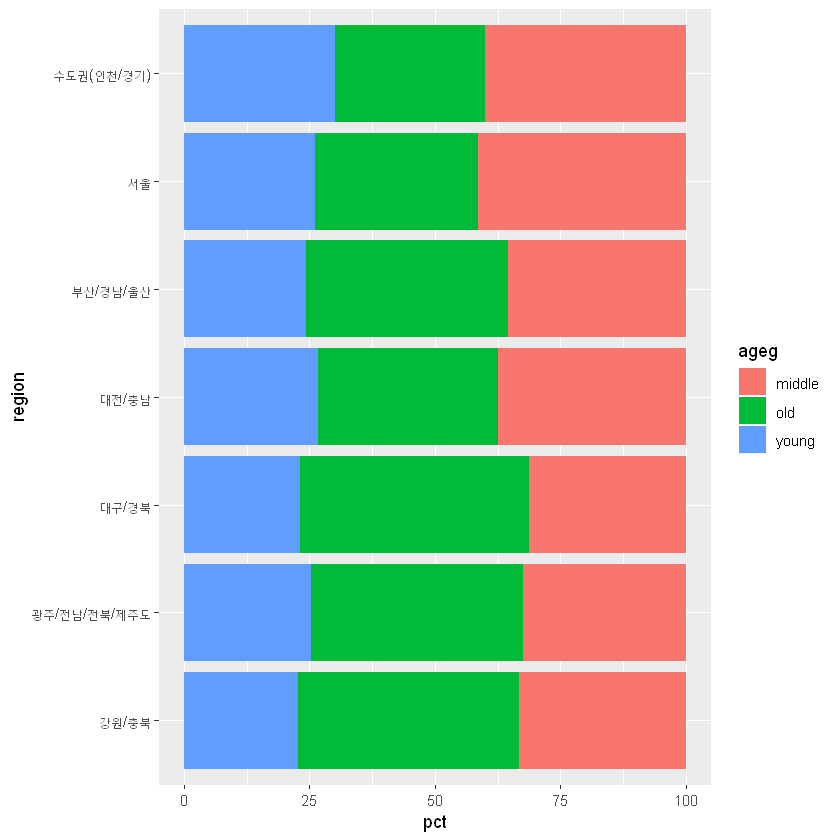

In [0]:
# 2. 그래프 만들기 
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) +   geom_col() +   coord_flip() 

In [0]:
# 3. 막대 정렬하기 : 노년층 비율 높은 순 
# 노년층 비율 내림차순 정렬
list_order_old <- region_ageg %>%   filter(ageg == "old") %>%   arrange(pct) 
 
list_order_old 
# 지역명 순서 변수 만들기
order <- list_order_old$region 
order 

region,ageg,n,tot_group,pct
수도권(인천/경기),old,1109,3711,29.88
서울,old,805,2486,32.38
대전/충남,old,527,1467,35.92
부산/경남/울산,old,1124,2785,40.36
광주/전남/전북/제주도,old,1233,2922,42.20
강원/충북,old,555,1257,44.15
대구/경북,old,928,2036,45.58


[1] 수도권(인천/경기)     서울                  대전/충남            
[4] 부산/경남/울산        광주/전남/전북/제주도 강원/충북            
[7] 대구/경북            
7 Levels: 강원/충북 광주/전남/전북/제주도 대구/경북 ... 수도권(인천/경기)

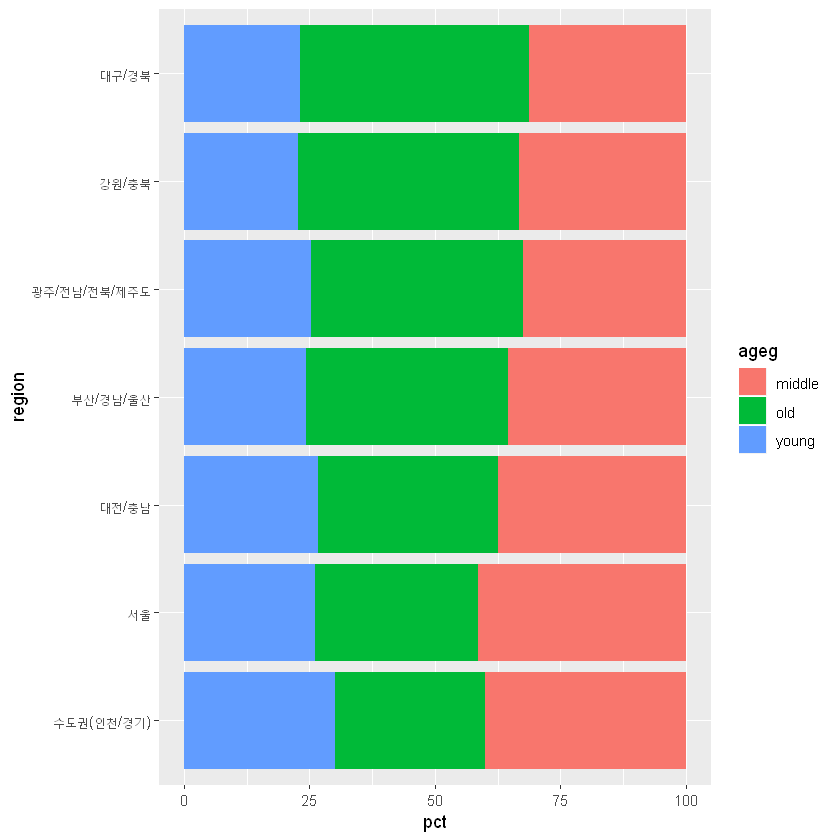

In [0]:
ggplot(data = region_ageg, aes(x = region,  y = pct, fill = ageg)) +   geom_col() +   coord_flip() +   scale_x_discrete(limits = order)

In [0]:
# 4. 연령대 순으로 막대 색깔 나열하기 
class(region_ageg$ageg) 

levels(region_ageg$ageg) 

region_ageg$ageg <- factor(region_ageg$ageg, 
                           level = c("old", "middle", "young")) 
class(region_ageg$ageg) 

levels(region_ageg$ageg) 

[1] "character"

NULL

[1] "factor"

[1] "old"    "middle" "young"

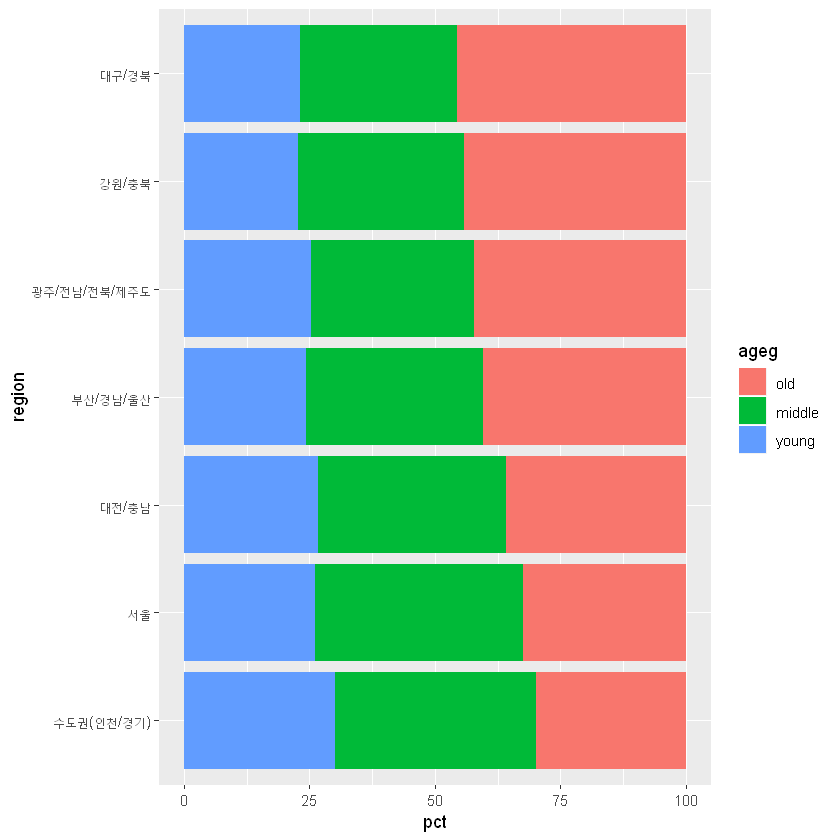

In [0]:
ggplot(data = region_ageg, aes(x = region,  y = pct, fill = ageg)) +   geom_col() +   coord_flip() +   scale_x_discrete(limits = order) 